In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [203]:
# importing files

train = pd.read_csv('C:/Users/Tobi/Desktop/data set/Financial inclusion Train_v2.csv')
test = pd.read_csv('C:/Users/Tobi/Desktop/data set/Financial inclusion Test_v2.csv')
var_def = pd.read_csv('C:/Users/Tobi/Desktop/data set/Financial inclusion VariableDefinitions.csv')

train_test_data = [train, test]

In [204]:
pd.set_option('display.max_columns', 10000)

var_def

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [205]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [206]:
train.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [207]:
#train['bank_account'] = train['bank_account'].astype(str)

In [208]:
train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [209]:
#bank_mapping = ('Yes',0, 'No',1)
#for x in train['bank_account']:
 #   x['bank_account']= x['bank_account'].map(bank_mapping)

In [210]:
train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [211]:
train.shape

(23524, 13)

In [212]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [213]:
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [214]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [215]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [216]:
train.keys()

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [217]:
train['bank_account'].unique()

array(['Yes', 'No'], dtype=object)

In [218]:
train['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [219]:
train['year'].unique()

array([2018, 2016, 2017], dtype=int64)

In [220]:
train['location_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [221]:
train['household_size'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 20, 21], dtype=int64)

In [222]:
train['age_of_respondent'].sort_values().unique()

array([ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [223]:
train['relationship_with_head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [224]:
train['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [225]:
train['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [226]:
test.shape

(10086, 12)

In [227]:
test.keys()

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [228]:
train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [229]:
#for x in train['bank_account']:
 #   train['bank_account'][train['bank_account']=='Yes'] = 0
  #  train['bank_account'][train['bank_account']=='No'] = 1

In [230]:
#train.bank_account = pd.Categorical(train.bank_account)

In [231]:
#train['bank_account'].astype(str)

In [232]:
#train['bank_account'] = train['bank_account'].astype(int)

In [233]:
train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [234]:
train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

# Visualisation

## Bar Chart for Categorical Feature

- Country
- Year
- Location type
- Cell phone access
- Gender
- Relationship with head
- Marital Status
- Education level
- Job type

In [235]:
#train['bank_account'].value_counts()

In [236]:
train[['country', 'bank_account']].groupby(['country'], as_index = False).sum().sort_values(by= 'bank_account', ascending = False)

,country,bank_account
0,Kenya,YesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoN...
1,Rwanda,NoYesNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNo...
2,Tanzania,NoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoN...
3,Uganda,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYe...


In [237]:
def barplot(features):
    has_account = train[train['bank_account']=='Yes'][features].value_counts()
    
    no_account  = train[train['bank_account']== 'No'][features].value_counts()
    
    df = pd.DataFrame([has_account, no_account])
    df.index = ['has_account', 'no_account']
    
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

In [238]:
country_mapping = {'Kenya':0, 'Rwanda':1, 'Tanzania':2, 'Uganda':3}

for dataset in train_test_data:
    dataset['country'] = dataset['country'].map(country_mapping)

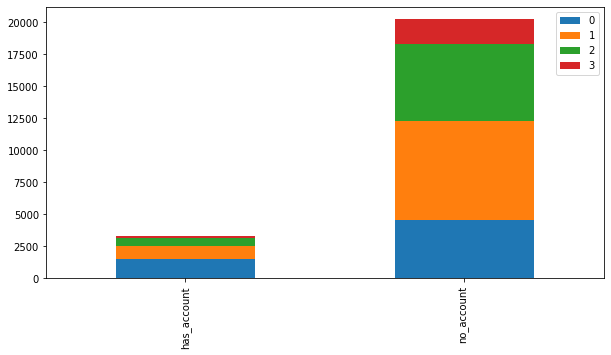

In [239]:
barplot('country')

==> Respondents from <b>Rwanda</b> are most likely not to have a bank account

In [240]:
train.dtypes

country                    int64
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [241]:
train[['year', 'bank_account']].groupby(['year'], as_index = False).sum().sort_values(by= 'bank_account', ascending = False)

,year,bank_account
2,2018,YesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoN...
0,2016,NoYesNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNo...
1,2017,NoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoN...


In [242]:
year_mapping = {2016:0, 2017:1, 2018:2}

for dataset in train_test_data:
    dataset['year']= dataset['year'].map(year_mapping)

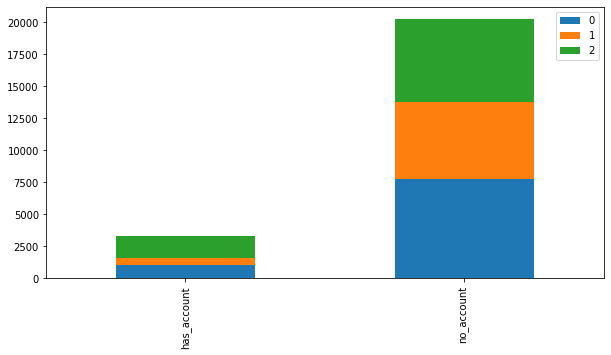

In [243]:
barplot('year')

In [244]:
location_mapping = {'Rural': 0, 'Urban':1}

for dataset in train_test_data:
    dataset['location_type'] = dataset['location_type'].map(location_mapping)

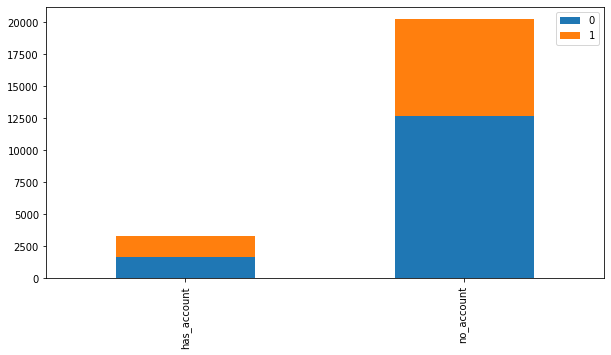

In [245]:
barplot('location_type')

==> Those from the <b>rural area</b> are mostly likely bor to have a bank account

In [246]:
train.dtypes

country                    int64
year                       int64
uniqueid                  object
bank_account              object
location_type              int64
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [100]:
cellphone_mapping = {'Yes':0, 'No':1}
for dataset in train_test_data:
    dataset['cellphone_access'] = dataset['cellphone_access'].map(cellphone_mapping)

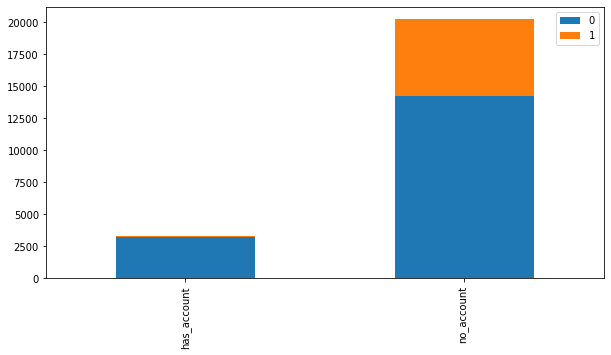

In [101]:
barplot('cellphone_access')

In [102]:
gender_mapping = {'Male':0, 'Female':1}

for dataset in train_test_data:
    dataset['gender_of_respondent']= dataset['gender_of_respondent'].map(gender_mapping)

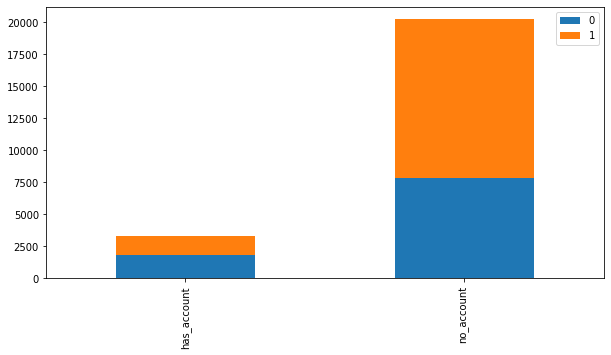

In [103]:
barplot('gender_of_respondent')

In [104]:
rwh_mapping = {'Head of Household': 0, 'Spouse': 1, 'Child':2, 'Other relative':3, 'Parent':3, 'Other non-relatives':4}

for dataset in train_test_data:
    dataset['relationship_with_head'] = dataset['relationship_with_head'].map(rwh_mapping)

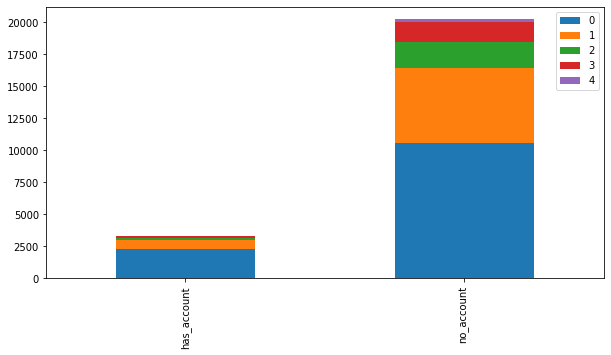

In [105]:
barplot('relationship_with_head')

In [106]:
marital_status_mapping = {'Married/Living together':0, 'Single/Never Married':1, 'Widowed':2, 'Divorced/Seperated':3, 'Dont know':4}

for dataset in train_test_data:
    dataset['marital_status'] = dataset['marital_status'].map(marital_status_mapping)

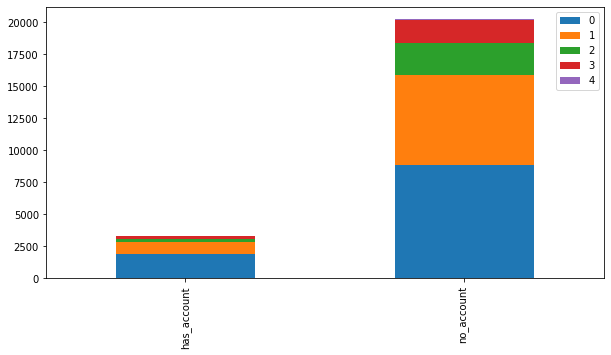

In [107]:
barplot('marital_status')

In [108]:
education_mapping = {'Primary education': 0, 'Secondary education': 1, 'Tertiary education':2, 'Vocational/Specialised training':3, 'No formal education':4, 'Other/Dont know/RTA':4}

for dataset in train_test_data:
    dataset['education_level']= dataset['education_level'].map(education_mapping)

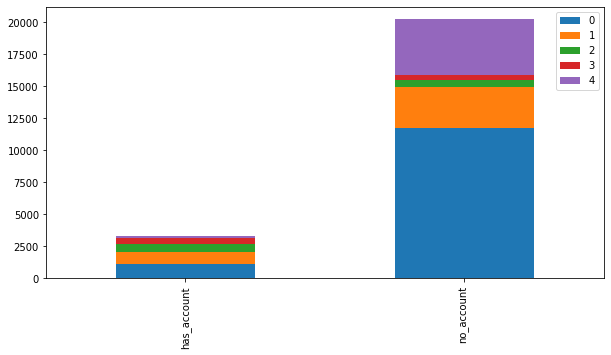

In [109]:
barplot('education_level')

In [110]:
train['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [111]:
train['job_type'].value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [112]:
job_mapping = {'Self employed':0, 'Farming and Fishing': 1, 'Formally employed Private': 2, 'Formally employed Government':2, 'Informally employed':3, 'Other Income':3, 'Remittance Dependent':4, 'Government Dependent':4, 'No Income':5, 'Dont Know/Refuse to answer':5}

for dataset in train_test_data:
    dataset['job_type']= dataset['job_type'].map(job_mapping)

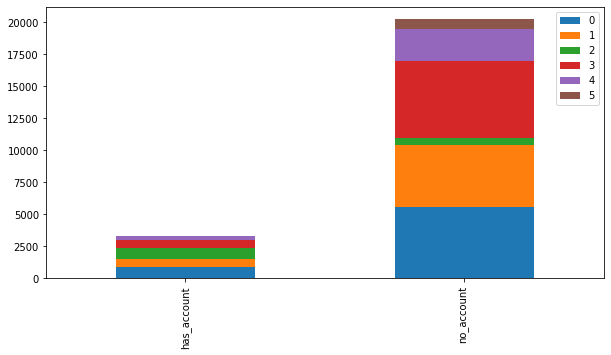

In [113]:
barplot('job_type')

In [114]:
train['job_type'].value_counts()

3    6677
0    6437
1    5441
4    2774
2    1442
5     753
Name: job_type, dtype: int64

In [115]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

## Numerical Variables

- Age
- Household size

In [116]:
train.keys()

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

<function matplotlib.pyplot.xlim(*args, **kwargs)>

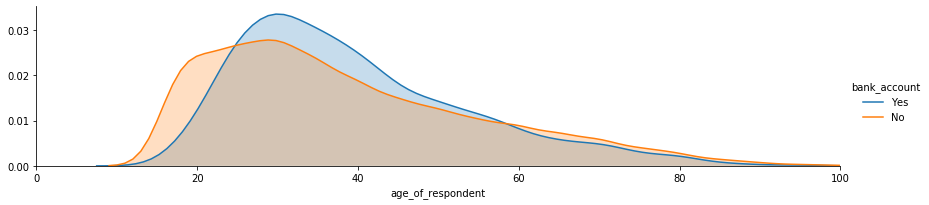

In [117]:
facet = sns.FacetGrid(train, hue = 'bank_account', aspect = 4)
facet.map(sns.kdeplot, 'age_of_respondent', shade = True)
facet.set(xlim=(0,train['age_of_respondent'].max()))
facet.add_legend()
plt.xlim

In [118]:
train['age_of_respondent'].value_counts()

30     1056
35      836
25      792
28      748
32      715
40      685
20      626
26      615
23      588
18      585
27      570
22      568
45      564
24      562
38      554
33      527
34      522
29      517
17      477
21      471
19      470
31      467
16      462
36      460
42      450
50      448
37      434
39      374
43      371
60      364
48      322
41      315
47      300
55      297
65      293
52      279
70      275
46      264
49      260
44      254
53      253
56      250
54      234
51      214
58      206
57      189
59      171
63      168
75      149
62      143
61      139
68      130
64      129
67      125
80      124
66      120
72       97
71       95
73       92
69       87
78       83
76       72
74       64
79       58
77       56
85       55
82       41
83       33
90       28
86       25
81       24
88       24
84       20
95       19
89       16
87       16
92        7
98        6
100       5
94        5
91        5
93        4
96        3
99  

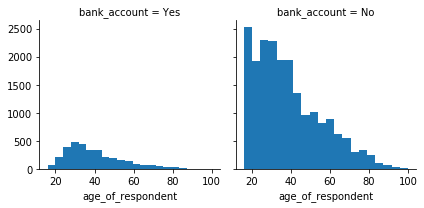

In [119]:
g = sns.FacetGrid(train, col = 'bank_account')
g.map(plt.hist, 'age_of_respondent', bins =20)

In [120]:
for dataset in train_test_data:
    dataset.loc[(dataset['age_of_respondent'] >=16) & (dataset['age_of_respondent'] <= 24), 'age_of_respondent'] = 0.2,
    dataset.loc[(dataset['age_of_respondent'] >24) & (dataset['age_of_respondent'] <= 34), 'age_of_respondent'] = 0.4,
    dataset.loc[(dataset['age_of_respondent'] >34) & (dataset['age_of_respondent'] <= 40), 'age_of_respondent'] = 0.6,
    dataset.loc[(dataset['age_of_respondent'] >40) & (dataset['age_of_respondent'] <= 46), 'age_of_respondent'] = 0.8,
    dataset.loc[(dataset['age_of_respondent'] >46) & (dataset['age_of_respondent'] <= 54), 'age_of_respondent'] = 1.0,
    dataset.loc[(dataset['age_of_respondent'] >40) & (dataset['age_of_respondent'] <= 66), 'age_of_respondent'] = 1.2,
    dataset.loc[(dataset['age_of_respondent'] >40) & (dataset['age_of_respondent'] <= 74), 'age_of_respondent'] = 1.4,
    dataset.loc[(dataset['age_of_respondent'] >40) & (dataset['age_of_respondent'] <= 80), 'age_of_respondent'] = 1.6,
    dataset.loc[(dataset['age_of_respondent'] >40) & (dataset['age_of_respondent'] <= 86), 'age_of_respondent'] = 1.8,
    dataset.loc[(dataset['age_of_respondent'] >86), 'age_of_respondent'] = 2.0,

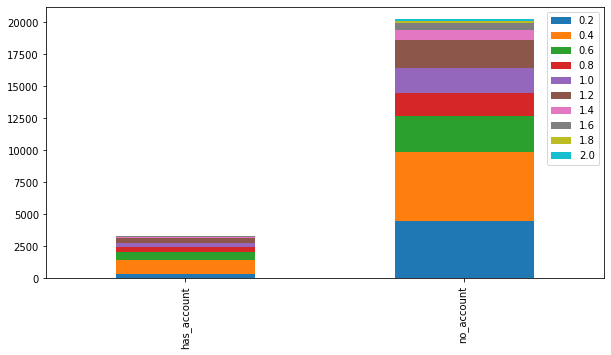

In [121]:
barplot('age_of_respondent')

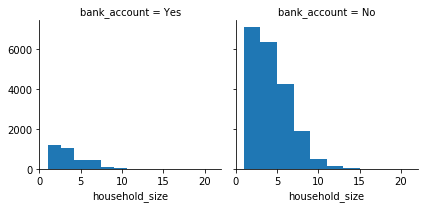

In [122]:
g = sns.FacetGrid(train, col = 'bank_account')
g.map(plt.hist, 'household_size')

In [123]:
train['household_size'].value_counts().sort_values()

21       1
17       1
18       1
20       1
16       4
14      10
15      11
13      25
12      68
11      69
10     190
9      363
8      751
7     1400
6     2096
5     2853
1     3057
4     3474
3     3920
2     5229
Name: household_size, dtype: int64

In [124]:
train['household_size'].min()

1

<function matplotlib.pyplot.xlim(*args, **kwargs)>

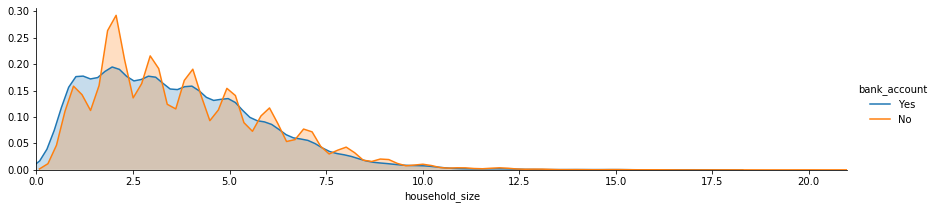

In [126]:
facet = sns.FacetGrid(train, hue = 'bank_account', aspect = 4)
facet.map(sns.kdeplot, 'household_size', shade = True)
facet.set(xlim=(0,train['household_size'].max()))
facet.add_legend()
plt.xlim

(12, 21)

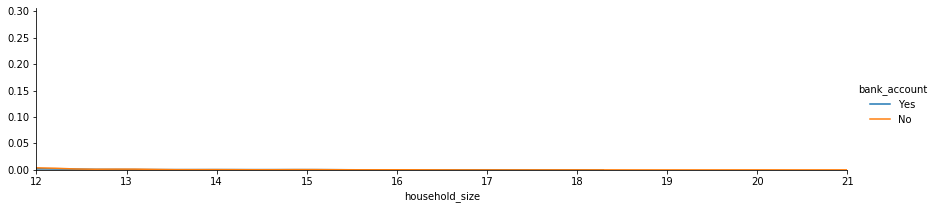

In [128]:
facet = sns.FacetGrid(train, hue = 'bank_account', aspect = 4)
facet.map(sns.kdeplot, 'household_size', shade = True)
facet.set(xlim=(0,train['household_size'].max()))
facet.add_legend()
plt.xlim(12, 21)

In [129]:
house_mapping = {1: 0, 2:0.2, 3:0.4, 4:0.6,  5:0.8, 6:1.0, 7:1.2, 8:1.4, 9:1.6, 10:1.8, 11:2.0,12:2.0, 13:2.0, 14:2.0, 15:2.0, 16:2.0, 17:2.0, 18:2.0, 19:2.0, 20:2.0, 21:2.0}

for dataset in train_test_data:
    dataset['household_size'] = dataset['household_size'].map(house_mapping)

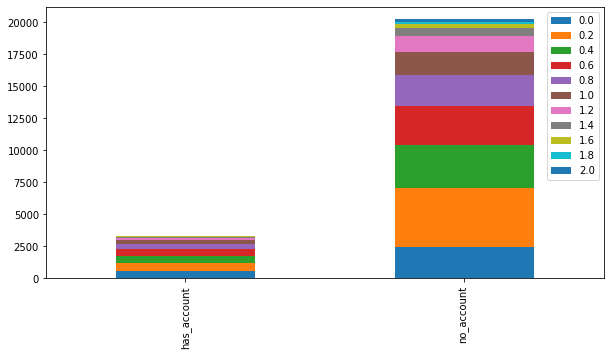

In [130]:
barplot('household_size')

In [131]:
train['household_size'].value_counts().sort_values()

1.8     190
2.0     191
1.6     363
1.4     751
1.2    1400
1.0    2096
0.8    2853
0.0    3057
0.6    3474
0.4    3920
0.2    5229
Name: household_size, dtype: int64

In [132]:
train.dtypes

country                     int64
year                        int64
uniqueid                   object
bank_account               object
location_type               int64
cellphone_access            int64
household_size            float64
age_of_respondent         float64
gender_of_respondent        int64
relationship_with_head      int64
marital_status              int64
education_level             int64
job_type                    int64
dtype: object

In [133]:
train.drop(['uniqueid'], axis = 1, inplace = True)

In [134]:
train.isnull().sum()

country                   0
year                      0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

# Modelling

In [135]:
train_data = train.drop('bank_account', axis = 1)
target = train['bank_account']

train.shape, target.shape

((23524, 12), (23524,))

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Cross validation (k-fold)

# Create KNN instance

knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model

knn.fit(train_data, target)

# make predictions from the X_test subset

test_data = test.drop('uniqueid', axis = 1).copy()

pred = knn.predict(test_data)

# Review the predictions
pred

from sklearn.metrics import zero_one_score

print(classification_report(y_test, pred))

test_data.head()

In [137]:
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state  =0)

## kNN

In [138]:
clf = KNeighborsClassifier(n_neighbors = 13)

scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)

print(score)

[0.87377816 0.88482788 0.89077773 0.88440289 0.88052721 0.88307823
 0.88137755 0.88690476 0.87712585 0.8792517 ]


In [142]:
# kNN error score

1 - (np.mean(score))

0.11779480385439334

## Decision Tree

In [143]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, target, cv=k_fold, n_jobs=1, scoring = scoring)

print(score)

[0.85550361 0.8440289  0.8601785  0.86060348 0.85459184 0.85459184
 0.85416667 0.85586735 0.86181973 0.84396259]


In [145]:
# decision tree error score

1 - (np.mean(score))

0.14546855078623044

## Random Forest

In [146]:
clf = RandomForestClassifier(n_estimators=13)

scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)

[0.86187845 0.86357841 0.87845304 0.86952826 0.85926871 0.87414966
 0.85926871 0.86862245 0.86862245 0.8579932 ]


In [147]:
# Random Forest Score

1 - (np.mean(score))

0.1338636665886075

## Naives Bayes

In [148]:
clf = GaussianNB()

scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs= 1, scoring= scoring)

print(score)

[0.82150446 0.83000425 0.82150446 0.8359541  0.82653061 0.81547619
 0.81590136 0.82993197 0.80952381 0.83248299]


In [151]:
# NAive Bayes Score

1 - (np.mean(score))

0.1761185785406385

## SVM

In [152]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)

c:\users\tobi\pycharmprojects\data_visualization\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\tobi\pycharmprojects\data_visualization\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\tobi\pycharmprojects\data_visualization\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

[0.87292818 0.8759031  0.88567786 0.88610285 0.875      0.88392857
 0.88647959 0.87797619 0.88477891 0.87627551]


In [153]:
1 - (np.mean(score))

0.11949492397894146

## Testing

In [154]:
clf = KNeighborsClassifier()

clf.fit(train_data, target)

test_data = test.drop('uniqueid', axis = 1).copy()

prediction = clf.predict(test_data)

In [158]:
train.dtypes

country                     int64
year                        int64
bank_account               object
location_type               int64
cellphone_access            int64
household_size            float64
age_of_respondent         float64
gender_of_respondent        int64
relationship_with_head      int64
marital_status              int64
education_level             int64
job_type                    int64
dtype: object

In [157]:
test.dtypes

country                     int64
year                        int64
uniqueid                   object
location_type               int64
cellphone_access            int64
household_size            float64
age_of_respondent         float64
gender_of_respondent        int64
relationship_with_head      int64
marital_status              int64
education_level             int64
job_type                    int64
dtype: object

In [247]:
country_mapping = {0:'Kenya', 1:'Rwanda', 2:'Tanzania', 3:'Uganda'}

for dataset in train_test_data:
    dataset['country'] = dataset['country'].map(country_mapping)

In [248]:
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],

"bank_account": prediction

})

submission.to_csv('submissionFinancialInclusion.csv', index = False)

In [249]:
print(prediction)

['No' 'Yes' 'No' ... 'No' 'No' 'No']
